In [3]:
import sys,os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,utils,layers,models
from tensorflow.keras import optimizers,losses,metrics
from tensorflow.keras import callbacks
from IPython.display import Image
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np

print(sys.version)
print(tf.__version__)



3.6.12 |Anaconda, Inc.| (default, Sep  9 2020, 00:29:25) [MSC v.1916 64 bit (AMD64)]
2.0.0


In [2]:
from urllib.request import urlretrieve
import os

filepath = "preprocessing.py"
url = "https://raw.githubusercontent.com/taipeitechmmslab/MMSLAB-TF2/master/preprocessing.py"

def download_py():    
    urlretrieve(url, filename=filepath)
    print("Downloaded",filepath)

if os.path.isfile(filepath):
    print("Files Exists")
else:
    download_py()
    
# 從資料夾中的preprocessing.py檔案中Import parse_aug_fn和parse_fn函數
from preprocessing import parse_aug_fn, parse_fn

Files Exists


### Activation Function 激活函數
1.ReLU

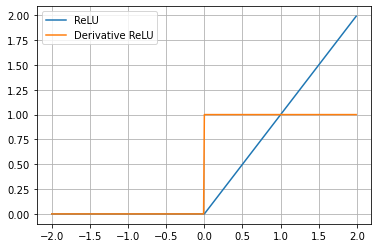

In [6]:
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, x, 0)
plt.plot(x, y, label="ReLU")
#plt.grid(True)
x = np.arange(-2, 2, 0.01)
y = np.where(x>0, 1, 0)
plt.plot(x, y, label="Derivative ReLU")
plt.grid(True)
plt.legend(loc="upper left")
plt.show()

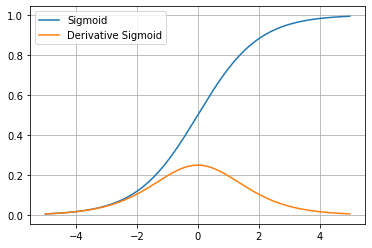

In [7]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1+np.exp(-x))
plt.plot(x, y, label="Sigmoid")
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = (1 / (1+np.exp(-x))) * (1- (1 / (1+np.exp(-x))))
plt.plot(x, y, label="Derivative Sigmoid")
#plt.grid(True)
plt.legend(loc="upper left")
plt.show()

1. Tanh

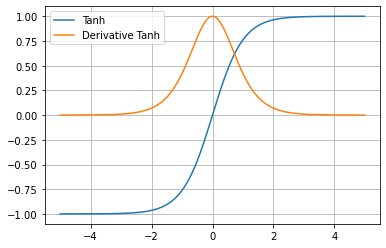

In [10]:
x = np.arange(-5, 5, 0.01)
y = (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))
plt.plot(x, y, label="Tanh")
plt.grid(True)
x = np.arange(-5, 5, 0.01)
y = 1 - np.square((np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x)))
plt.plot(x,  y, label="Derivative Tanh")
plt.legend(loc="upper left")
plt.show()

### 權重初始化
RandomNormal (std 1 )  標準差 1

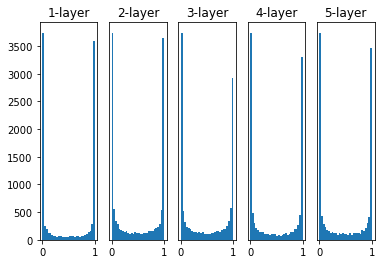

In [12]:
from tensorflow.keras import initializers
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 1))(x4)
model_1 = keras.Model(inputs, [x1, x2, x3, x4, x5])

x = np.random.randn(100, 100)
outputs = model_1.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

RandomNormal (std 0.05 )  標準差 0.05

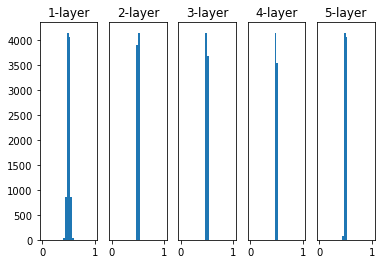

In [13]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.RandomNormal(0, 0.01))(x4)
model_2 = keras.Model(inputs, [x1, x2, x3, x4, x5])

x = np.random.randn(100, 100)
outputs = model_2.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

Xavier/Glorot Initialization (Sigmoid)

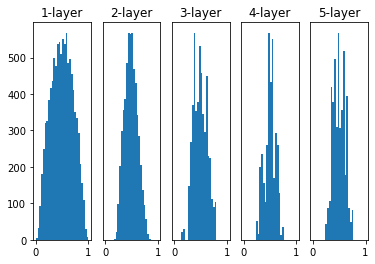

In [14]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'sigmoid', False, initializers.glorot_normal())(x4)
model_3 = keras.Model(inputs, [x1, x2, x3, x4, x5])

x = np.random.randn(100, 100)
outputs = model_3.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

Xavier/Glorot Initialization (ReLU)

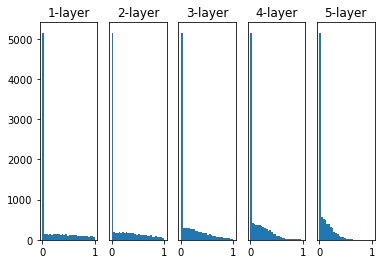

In [15]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.glorot_normal())(x4)
model_4 = keras.Model(inputs, [x1, x2, x3, x4, x5])

x = np.random.randn(100, 100)
outputs = model_4.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

He initialization

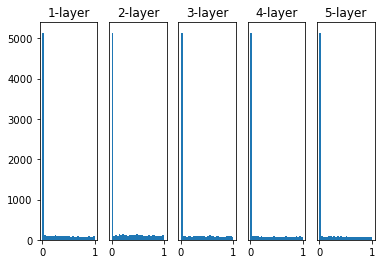

In [16]:
inputs = keras.Input(shape=(100,))
x1 = layers.Dense(100, 'relu', False, initializers.he_normal())(inputs)
x2 = layers.Dense(100, 'relu', False, initializers.he_normal())(x1)
x3 = layers.Dense(100, 'relu', False, initializers.he_normal())(x2)
x4 = layers.Dense(100, 'relu', False, initializers.he_normal())(x3)
x5 = layers.Dense(100, 'relu', False, initializers.he_normal())(x4)
model_5 = keras.Model(inputs, [x1, x2, x3, x4, x5])

x = np.random.randn(100, 100)
outputs = model_5.predict(x)
for i, layer_output in enumerate(outputs):
    plt.subplot(1, 5, i+1)  # 選擇顯示在表中的哪個格子裡
    plt.title(str(i+1) + "-layer")  # 設定值方圖的標題
    if i != 0: plt.yticks([], [])  # 只顯示第一列值方圖的y軸
    plt.hist(layer_output.flatten(), 30, range=[0,1])  # 畫出值方圖
plt.show()

### 實驗一：使用CIFAR-10數據集實驗證三種權重初始化方法

In [17]:

# # 將train Data重新分成9:1等分，分別分給train data, valid data
# train_split, valid_split = ['train[:90%]', 'train[90%:]']
# # 取得訓練數據，並順便讀取data的資訊
# train_data, info = tfds.load("cifar10", split=train_split, with_info=True, data_dir='/home/share/dataset/tensorflow-datasets')
# # 取得驗證數據
# valid_data = tfds.load("cifar10", split=valid_split, data_dir='/home/share/dataset/tensorflow-datasets')
# # 取得測試數據
# test_data = tfds.load("cifar10", split=tfds.Split.TEST, data_dir='/home/share/dataset/tensorflow-datasets')

# AUTOTUNE = tf.data.experimental.AUTOTUNE  # 自動調整模式
# batch_size = 64  # 批次大小
# train_num = int(info.splits['train'].num_examples / 10) * 9  # 訓練資料數量

# train_data = train_data.shuffle(train_num)  # 打散資料集
# # 載入預處理「 parse_aug_fn」function，cpu數量為自動調整模式
# train_data = train_data.map(map_func=parse_aug_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
# train_data = train_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# # 載入預處理「 parse_fn」function，cpu數量為自動調整模式
# valid_data = valid_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
# valid_data = valid_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

# # 載入預處理「 parse_fn」function，cpu數量為自動調整模式
# test_data = test_data.map(map_func=parse_fn, num_parallel_calls=AUTOTUNE)
# # 設定批次大小並將prefetch模式開啟(暫存空間為自動調整模式)
# test_data = test_data.batch(batch_size).prefetch(buffer_size=AUTOTUNE)

In [18]:
def data_normalize(train, test, scale=1):
    (x_train,y_train) = train
    (x_test,y_test) = test
    train_nums = x_train.shape[0] // scale
    test_nums = x_test.shape[0] // scale
    x_train, y_train = x_train[:train_nums], y_train[:train_nums]
    x_test, y_test = x_test[:test_nums], y_test[:test_nums]
   
    #x_train = parse_aug_fn(x_train)
    #x_test = parse_aug_fn(x_test)
    
    x_train = x_train.astype(np.float32) / 255.
    x_test = x_test.astype(np.float32) / 255. 
    #x_train = tf.reshape(x_train, shape=(-1,28*28))
    #x_test = tf.reshape(x_test, shape=(-1,28*28))
    y_train = utils.to_categorical(y_train).astype(np.int32)
    y_test = utils.to_categorical(y_test).astype(np.int32)
    print(x_train.shape,y_train.shape)
    print(x_test.shape,y_test.shape)
    
    return (x_train,y_train),(x_test,y_test)

(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)
(x_train,y_train),(x_test,y_test) = data_normalize((x_train,y_train),(x_test,y_test),scale=10)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)
(5000, 32, 32, 3) (5000, 10)
(1000, 32, 32, 3) (1000, 10)


In [42]:
def build_and_train_model(session_name, kernel_initializer):
    inputs = layers.Input(shape=(32,32,3))
    x = layers.Conv2D(32, (3,3), activation="relu", kernel_initializer=kernel_initializer)(inputs)
    x = layers.Conv2D(64, (3,3), activation="relu", kernel_initializer=kernel_initializer)(x)
    x = layers.Conv2D(128, (3,3), activation="relu", kernel_initializer=kernel_initializer)(x)
    x = layers.Conv2D(64, (3,3), activation="relu", kernel_initializer=kernel_initializer)(x)
    x = layers.Conv2D(32, (3,3), activation="relu", kernel_initializer=kernel_initializer)(x)
    x = layers.Flatten()(x)
    x = layers.Dense(32, activation="relu", kernel_initializer=kernel_initializer)(x)
    x = layers.Dropout(0.3)(x)
    outputs = layers.Dense(10, activation="softmax")(x)
    model = models.Model(inputs, outputs,name="model"+session_name)
    
    # 儲存訓練記錄檔
    #logfiles = 'lab5-logs/{}-{}'.format(run_name, init.__class__.__name__)
    log_basename = "{}-{}".format(session_name, kernel_initializer.__class__.__name__)
    log_dir = os.path.join("models","lab5-logs",log_basename)
    print("log_dir",log_dir)
    model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir) # , histogram_freq=1    
    # 儲存最好的網路模型權重
    #modelfiles = model_dir + '/{}-best-model.h5'.format(run_name)
    basename = "{}-best-model.h5".format(session_name)
    model_file = os.path.join("models","lab5-logs",basename)
    print("modelfile",model_file)
    model_mckp = keras.callbacks.ModelCheckpoint(model_file, 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')
    
    model.compile(optimizer=optimizers.Adam(),
                  loss=losses.CategoricalCrossentropy(),
                  metrics=[metrics.CategoricalAccuracy()])
    history = model.fit(x_train, y_train, 
                batch_size=batch_size ,
                epochs=epochs, 
                validation_split=0.2,
                verbose=2,
                callbacks=[model_mckp])# model_cbk
    
    return history
    
model_dir = 'models/lab5-logs/'
os.makedirs(model_dir, exist_ok=True)
epochs =3
batch_size = 64

session_num = 1
weights_initialization_list = [initializers.RandomNormal(0, 0.01),
                        initializers.glorot_normal(),
                        initializers.he_normal()]
historys = []

for init in weights_initialization_list:
    print('--- Running training session %d' % (session_num))
    run_name = "run-%d" % session_num
    history = build_and_train_model(run_name, init)  # 創建和訓練網路
    historys.append(history)
    session_num += 1


--- Running training session 1
log_dir models\lab5-logs\run-1-RandomNormal
modelfile models\lab5-logs\run-1-best-model.h5
Train on 4000 samples, validate on 1000 samples
Epoch 1/3
4000/4000 - 29s - loss: 2.3028 - categorical_accuracy: 0.0970 - val_loss: 2.3027 - val_categorical_accuracy: 0.0970
Epoch 2/3
4000/4000 - 28s - loss: 2.3024 - categorical_accuracy: 0.1005 - val_loss: 2.3027 - val_categorical_accuracy: 0.0970
Epoch 3/3
4000/4000 - 28s - loss: 2.3022 - categorical_accuracy: 0.1030 - val_loss: 2.3026 - val_categorical_accuracy: 0.0970
--- Running training session 2
log_dir models\lab5-logs\run-2-GlorotNormal
modelfile models\lab5-logs\run-2-best-model.h5
Train on 4000 samples, validate on 1000 samples
Epoch 1/3
4000/4000 - 30s - loss: 2.2557 - categorical_accuracy: 0.1430 - val_loss: 2.1407 - val_categorical_accuracy: 0.2000
Epoch 2/3
4000/4000 - 31s - loss: 2.0862 - categorical_accuracy: 0.2087 - val_loss: 1.9279 - val_categorical_accuracy: 0.2660
Epoch 3/3
4000/4000 - 29s - lo

['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


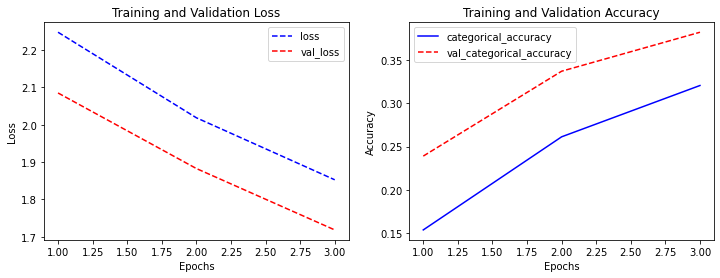

['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


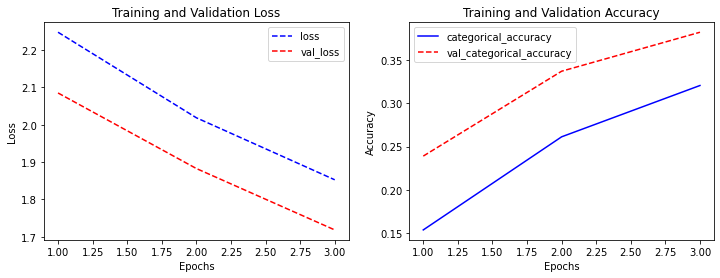

['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


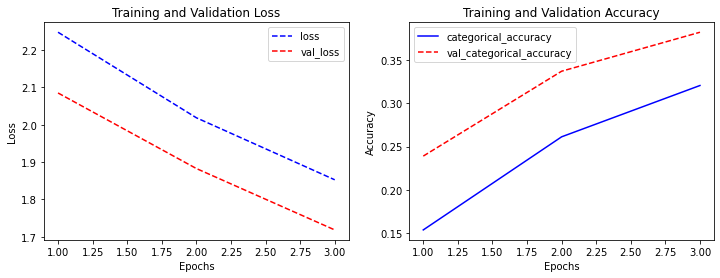

In [43]:
def visual_train_status(history):
    keys = [key for key in history.history.keys()]
    print(keys)
    plt.figure(figsize=(12,4))
    loss = history.history[keys[0]]
    val_loss = history.history[keys[2]]
    epochs = range(1, len(loss)+1)  
    plt.subplot(1,2,1)
    plt.plot(epochs, loss, "b--", label=keys[0])
    plt.plot(epochs, val_loss, "r--", label=keys[2])
    plt.title("Training and Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()

    # 顯示訓練和驗證準確度
    acc = history.history[keys[1]]
    val_acc = history.history[keys[3]]
    epochs = range(1, len(acc)+1)
    plt.subplot(1,2,2)
    plt.plot(epochs, acc, "b-", label=keys[1])
    plt.plot(epochs, val_acc, "r--", label=keys[3])
    plt.title("Training and Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()
    
for hitory in historys:
    visual_train_status(history)

In [44]:
batch_size = 128
model_1 = keras.models.load_model('models/lab5-logs/run-1-best-model.h5')
model_2 = keras.models.load_model('models/lab5-logs/run-2-best-model.h5')
model_3 = keras.models.load_model('models/lab5-logs/run-3-best-model.h5')
loss_1, acc_1 = model_1.evaluate(x_test,y_test, batch_size=batch_size ,verbose=0)
print("Finish model_1")
loss_2, acc_2 = model_2.evaluate(x_test,y_test, batch_size=batch_size ,verbose=0)
print("Finish model_2")
loss_3, acc_3 = model_3.evaluate(x_test,y_test, batch_size=batch_size ,verbose=0)
print("Finish model_3")
loss = [loss_1, loss_2, loss_3]  
acc = [acc_1, acc_2, acc_3]

dict = {"Loss": loss,  
        "Accuracy": acc}

df = pd.DataFrame(dict)
print(df)

Finish model_1
Finish model_2
Finish model_3
       Loss  Accuracy
0  2.302451     0.090
1  1.788036     0.352
2  1.724711     0.381


### 實驗二：使用CIFAR-10數據集實驗Batch Normalization方法
建立網路模型，這邊使用到以下幾種網路層：

* keras.Input：輸入層(輸入影像大小為32x32x3)
* layers.Conv2D：卷積層(使用3x3大小的kernel)
* layers.BatchNormalization：BatchNormalization層(使用預設參數)
* layers.ReLU：ReLU激活函數層(使用在BatchNormalization層之後)
* layers.MaxPool2D：池化層(對特徵圖下採樣)
* layers.Flatten：扁平層(特徵圖轉成一維Tensor)
* layers.Dropout：Dropout層(每次訓練隨機丟棄50%網路)
* layers.Dense：全連接層(隱藏層使用ReLU激活函數，輸出層使用Softmax激活函數)  

因為大部分激活函數都會在BatchNormalization之後，所以這邊的搭建與前幾個model有些差別。

In [45]:
inputs = keras.Input(shape=(32, 32, 3))
x = layers.Conv2D(32, (3, 3))(inputs)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.MaxPool2D()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(128, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(64, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Conv2D(32, (3, 3))(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Flatten()(x)
x = layers.Dense(32)(x)
x = layers.BatchNormalization()(x)
x = layers.ReLU()(x)
x = layers.Dropout(0.3)(x)
outputs = layers.Dense(10, activation='softmax')(x)
# 建立網路模型(將輸入到輸出所有經過的網路層連接起來)
model_4 = keras.Model(inputs, outputs, name='model-4')
model_4.summary()  # 顯示網路架構

Model: "model-4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_30 (InputLayer)        [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_115 (Conv2D)          (None, 30, 30, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 30, 32)        128       
_________________________________________________________________
re_lu (ReLU)                 (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_116 (Conv2D)          (None, 13, 13, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 13, 13, 64)        256 

In [47]:
# 儲存訓練記錄檔
log_dir = os.path.join("models",'lab5-logs', 'run-4-batchnormalization')
model_cbk = keras.callbacks.TensorBoard(log_dir=log_dir)
# 儲存最好的網路模型權重
model_path = os.path.join("models",'lab5-logs',"run-4-best-model.h5")
model_mckp = keras.callbacks.ModelCheckpoint(model_path, 
                                             monitor='val_categorical_accuracy', 
                                             save_best_only=True, 
                                             mode='max')

model_4.compile(keras.optimizers.Adam(), 
               loss=keras.losses.CategoricalCrossentropy(), 
               metrics=[keras.metrics.CategoricalAccuracy()])

epochs =3
batch_size = 64
history_4 = model_4.fit(x_test,
                        y_test,
                        epochs=epochs, 
                        batch_size=batch_size,
                        validation_split=0.2,
                        verbose=2,
                        callbacks=[model_mckp])

Train on 800 samples, validate on 200 samples
Epoch 1/3
800/800 - 5s - loss: 2.3098 - categorical_accuracy: 0.1900 - val_loss: 2.2737 - val_categorical_accuracy: 0.1300
Epoch 2/3
800/800 - 3s - loss: 1.8107 - categorical_accuracy: 0.3600 - val_loss: 2.2651 - val_categorical_accuracy: 0.1500
Epoch 3/3
800/800 - 3s - loss: 1.5584 - categorical_accuracy: 0.4963 - val_loss: 2.3132 - val_categorical_accuracy: 0.1400



Model-4 Accuracy: 0.1550000011920929%
       Loss  Accuracy
0  2.302451     0.090
1  1.788036     0.352
2  1.724711     0.381
3  2.271645     0.155
['loss', 'categorical_accuracy', 'val_loss', 'val_categorical_accuracy']


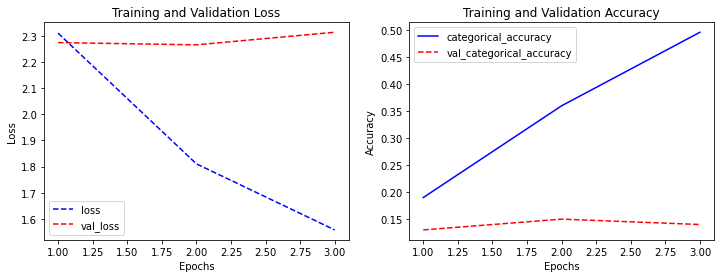

In [49]:
model_4 = keras.models.load_model('models/lab5-logs/run-4-best-model.h5')
batch_size = 128
loss_4, acc_4 = model_4.evaluate(x_test,y_test, batch_size=batch_size ,verbose=0)
print('\nModel-4 Accuracy: {}%'.format(acc_4))

loss = [loss_1, loss_2, loss_3, loss_4]  
acc = [acc_1, acc_2, acc_3, acc_4]

dict = {"Loss": loss,  
        "Accuracy": acc}
df = pd.DataFrame(dict)
print(df)
visual_train_status(history_4)